In [27]:
import numpy as np
import pandas as pd
import regex as re
import requests
import nltk

import matplotlib.pyplot as plt

from collections import Counter

from bs4 import BeautifulSoup
from snowballstemmer import TurkishStemmer

from  nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA


In [28]:
!pip install wordcloud

In [29]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [30]:
from wordcloud import WordCloud

In [57]:

def news(url):
    with requests.get(url) as link:
        raw = BeautifulSoup(link.content,'html.parser')
    text = raw.find('div', attrs={'class': 'pagebreak','data-page-order':'1'}).text

    text1 = raw.find('div', attrs={'class': 'pagebreak','data-page-order':'2'}).text

    text2 = raw.find('div', attrs={'class': 'pagebreak','data-page-order':'3'}).text

    text3 = raw.find('div', attrs={'class': 'pagebreak','data-page-order':'4'}).text

    ac_text = text + text1 + text2 + text3
    ac_text
    data = re.sub(r'[^\w\s]','',ac_text.lower()).split()
    print(data)

    stemmer = TurkishStemmer()
    cleaned = stemmer.stemWords(data)
    res = Counter(cleaned)
    dict(sorted(res.items(), key=lambda x: x[1], reverse=True))
    plt.figure(figsize=(12,12))
    cloud = WordCloud(width = 1500, height = 1200,
                  background_color ='white',
                  stopwords = stopwords.words('turkish'),
                  min_font_size = 10)
    plt.imshow(cloud.generate(' '.join(cleaned)))
    

['i̇stanbulda', 'olay', 'dün', 'öğlen', 'saatlerinde', 'arnavutköy', 'i̇slambey', 'mahallesi', 'fetih', 'sokakta', 'meydana', 'geldi', 'i̇ddiaya', 'göre', '1', 'yıl', 'önce', 'enişteleri', 'ile', 'yaşadıkları', 'problem', 'nedeniyle', 'kavga', 'eden', 'yıldız', 've', 'karaboğa', 'aileleri', 'arasında', 'husumet', 'devam', 'etti', 'araçtan', 'ateş', 'açildi', 'dhada', 'yer', 'alan', 'habere', 'göre', 'i̇sa', 've', 'ömer', 'yıldız', 'kardeşler', 'dün', 'öğle', 'saatlerinde', 'arnavutköyde', 'yaşadıkları', 'mahallede', 'sokakta', 'yürürken', 'yanlarına', 'yanaşan', 'eniştesi', 'erhan', 'karaboğa', 've', 'kardeşi', 'emir', 'karaboğanın', 'içinde', 'bulunduğu', 'hafif', 'ticari', 'araçtan', 'ateş', 'açıldı', 'bi̇ri̇', 'bacağindan', 'di̇ğeri̇', 'göğsünden', 'yaralandi', 'saldırı', 'sonucu', 'ömer', 'yıldız', 'bacağından', 'yaralanırken', 'kardeşi', 'i̇sa', 'yıldız', 'göğsünden', 'yaralandı', 'i̇hbar', 'üzerine', 'olay', 'yerine', 'polis', 've', 'sağlık', 'ekipleri', 'sevk', 'edildi', 'durumu

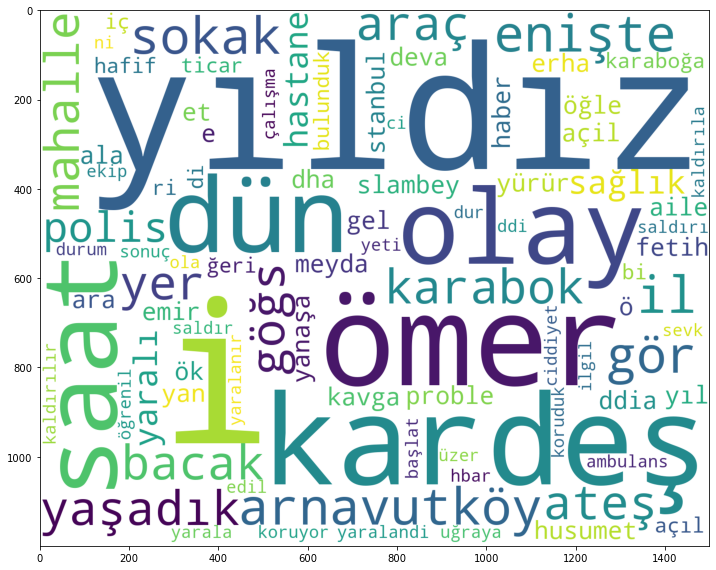

In [67]:
news("https://www.haberturk.com/istanbul-da-dehset-eniste-kursun-yagdirdi-3545882")

['i̇stanbul', 'fatih', 'aksaray', 'mesih', 'paşa', 'mahallesinde', '5', 'aralıkta', 'meydana', 'gelen', 'olayda', 'geceyarısı', 'iki', 'grup', 'arasında', 'silahlı', 'kavga', 'çıktı', 'dakikalarca', 'süren', 'kavgada', 'bahodur', 'barotov', 'tabancayla', 'vurularak', 'öldürüldü', 'kavgada', 'shams', 'a', '30', 've', 'shahromjon', 'g', '24', 'ise', 'yaralandı', 'güvenli̇k', 'kameralari', 'i̇ncelendi̇', 'dhada', 'yer', 'alan', 'habere', 'göre', 'cinayet', 'büro', 'amirliği', 'güvenlik', 'kamerası', 'görüntülerini', 'inceledi', 'görüntülerde', 'iki', 'gruba', 'ayrılan', 'şüphelilerin', 'birbirlerine', 'silah', 'göstererek', 'tehditler', 'savurdukları', 'ardından', 'koşarak', 'gelen', 'bir', 'kişinin', 'ateş', 'etmeye', 'başladığı', 'tespit', 'edildi', 'şebekeni̇n', 'taci̇ki̇stanli', 'olduğu', 'saptandi', 'cinayet', 'büro', 'amirliği', 'ekipleri', 'olayla', 'ilgili', 'başlattıkları', 'soruşturmada', 'çatışan', 'şüphelilerin', 'tacikistanlı', 'bir', 'şebeke', 'olduğunu', 'belirledi', 'tarti

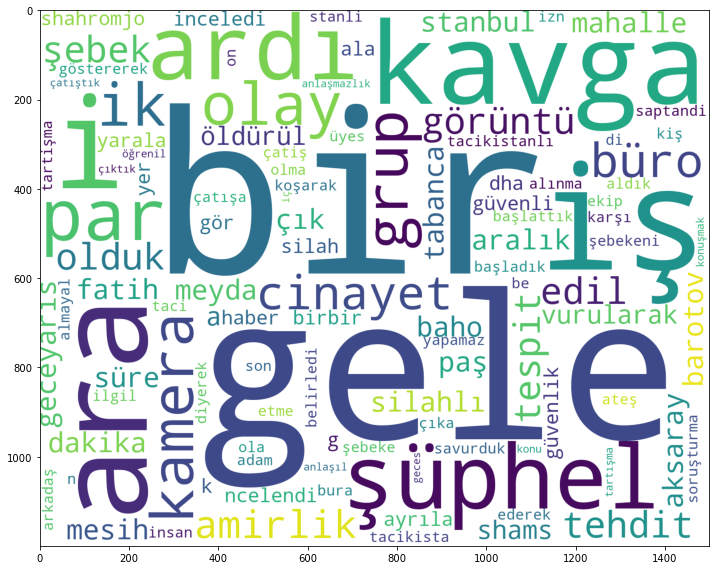

In [59]:
news('https://www.haberturk.com/bir-kisi-oldu-iki-kisi-yarali-tacikistanli-cete-istanbul-da-catisti-3545844')

['esenlerdeki', 'ayvalıdere', 'yağmur', 'suyu', 'tüneli', 've', 'atık', 'su', 'kanalından', 'mavi', 'renkte', 'akan', 'su', 'endişeye', 'neden', 'oldu', 'dhada', 'yer', 'alan', 'habere', 'göre', 'i̇ski̇den', 'yapılan', 'açıklamada', 'bayrampaşa', 'i̇lçesinde', 'atık', 'su', 'hattında', 'meydana', 'gelen', 'çökme', 'olayı', 'ayvalıdereye', 'farklı', 'renkte', 'su', 'karışmasına', 'sebep', 'olmuştur', 'denildi', 'esenlerde', 'bulunan', 'ayvalıdere', 'için', '2017', 'yılında', 'ıslah', 'çalışması', 'başlatılmış', 'yağmur', 'suyu', 'tüneli', 've', 'atık', 'su', 'kanalına', 'çevrilmişti', 'eyüpsultan', 'bayrampaşa', 'güngören', 'esenler', 'zeytinburnu', 'bakırköy', 'ilçelerindeki', 'su', 'baskınlarının', 'önüne', 'geçmek', 'için', 'yapılan', 'inşaat', 'sonrasında', 'yağmur', 'suyu', 'tüneli', 've', 'atık', 'su', 'kanalı', 'devreye', 'girmişti', 'bölgede', 'imalathane', 'ilaç', 'üretim', 'tesisi', 'fabrika', 'tekstil', 'atölyesinin', 'yanı', 'sıra', 'çok', 'sayıda', 'yerleşim', 'yeri', 'lise

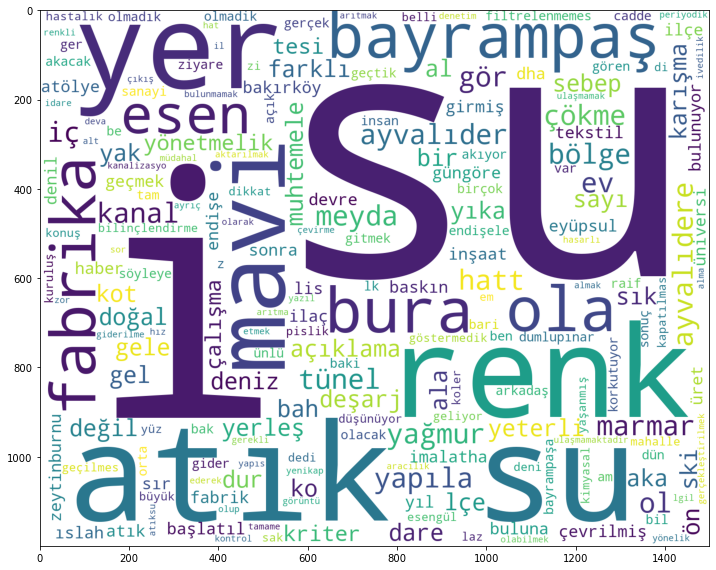

In [60]:
news('https://www.haberturk.com/son-dakika-atik-su-hattindaki-cokme-derenin-rengini-degistirdi-3544921')

['tekirdağda', 'olay', 'temmuz', 'ayında', 'kapaklı', 'ilçesindeki', 'çosb', 'kreş', 've', 'gündüz', 'bakım', 'evinde', 'meydana', 'geldi', 'anne', 'ee', 'evde', 'kızı', 'denin', 'oynadığı', 'bebeğini', 'ellerini', 'kurdele', 'ile', 'arkadan', 'bağlayıp', 'uyutması', 'üzerine', 'şüphelendi', 'di̇ğer', 'veli̇lerle', 'i̇leti̇şi̇me', 'geçti̇', 'annesinin', 'bunu', 'neden', 'yaptığını', 'sorduğu', 'de', 'kreşte', 'uyumayan', 'çocukları', 'öğretmenlerinin', 'bağlayarak', 'uyuttuğunu', 'söyledi', 'bunun', 'üzerine', 'ee', 'bağlayan', 'öğretmenlerin', 'isimlerini', 'kızından', 'öğrendi', 'diğer', 'velilerle', 'irtibata', 'geçti', 'güvenli̇k', 'kameralarinin', 'i̇ncelenmesi̇ni̇', 'i̇stedi̇ler', 'ee', '250', 'öğrencisi', 'bulunan', 'kreş', 'yönetimi', 'ile', 'görüşmek', 'istedi', 'olumlu', 'talep', 'alamayan', 'veliler', 'bu', 'yılın', 'haziran', 'temmuz', 've', 'ağustos', 'ayına', 'ait', 'güvenlik', 'kamerası', 'görüntülerinin', 'kayıtlarının', 'incelenmesini', 'istedi', 'bu', 'talebi', 'de', 

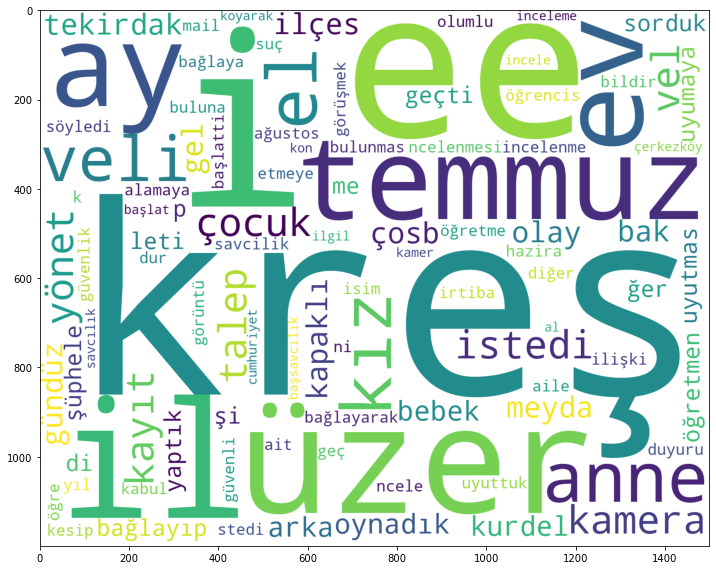

In [66]:
news('https://www.haberturk.com/tekirdag-kres-2-ogretmenin-isine-son-verildi-dehset-kresi-3545983?page=8')

['kocaelinin', 'gebze', 'ilçesinde', 'takip', 'ettiği', 'ayşegül', 'aydını', '16', 'cinsel', 'istismar', 'girişiminde', 'bulunup', 'başına', 'taşla', 'vurarak', 'öldüren', 'afganistan', 'uyruklu', 'muhammed', 'atikullah', '20', 'ikinci', 'kez', 'hakim', 'karşısına', 'çıktı', 'dhada', 'yer', 'alan', 'habere', 'göre', 'mahkeme', 'salonunda', 'ilk', 'duruşmada', 'çıkan', 'olaylar', 'sebebiyle', 'tercümanın', 'da', 'segbi̇s', 'sistemi', 'ile', 'bağlandığı', 'duruşmada', 'teknik', 'aksaklıklar', 'nedeniyle', 'sanığın', 'ifadesi', 'yine', 'alınamadı', 'sanık', 've', 'tercümanın', 'sonraki', 'celse', 'salona', 'getirilmesine', 'karar', 'verildi', 'adli', 'tıp', 'kurumundan', 'gelen', 'raporda', 'ise', 'afgan', 'sanık', 'atikullahın', 'hayatını', 'kaybeden', 'ayşegüle', 'tecavüz', 'ettiğinin', 'belirlendiği', 'belirtildi', 'olay', 'geçen', 'yıl', '12', 'temmuzda', 'gebze', 'ilçesi', 'pelitli', 'mahallesinde', 'meydana', 'geldi', 'afganistan', 'uyruklu', 'muhammed', 'atikullah', 'dershaneden', 

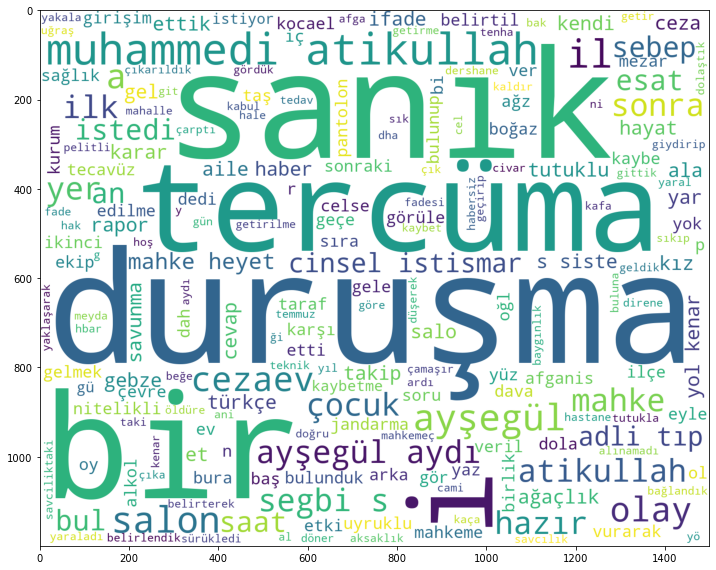

In [64]:
news('https://www.haberturk.com/son-dakika-aysegul-aydin-cinayetinde-katil-zanlisi-icin-flas-karar-3546043?page=4')